In [1]:
import pandas as pd

# Loading Dataset

In [2]:
def load_dataset(path):
    df = pd.read_csv(path, index_col=0)
    df = delete_movies(movies_delete, df)
    return df

In [3]:
def delete_movies(lst, df):
    indices = df[df['movie_name'].isin(lst)].index
    df = df.drop(indices)
    return df

In [4]:
movies_delete = ['Guardians of the Galaxy Vol 2', 'Guardians of the Galaxy',
       'Rocketman', 'The Invisible Man', '12 Years a Slave',
       'Murder on the Orient Express', 'X-Men', 'Teen Wolf']

In [5]:
movies_df = load_dataset('data/all_movies.csv')
delete_movies(movies_delete, movies_df)
movies_df.head()

,movie_name,index,utterance,count_utterances,tag
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism
2,12 Angry Men,2,Shh. Shh.,2065,racism
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism


In [6]:
movies_df.shape

(351280, 5)

# Word Embedding

In [7]:
annotations_word_embedding_fox_news_df = load_dataset('annotations/annotations_word_embedding_fox_news.csv')
annotations_word_embedding_fox_news_df.rename(columns={'label': 'we_label_fox_news'}, inplace=True)
annotations_word_embedding_fox_news_df

,movie_name,index,we_label_fox_news
0,12 Angry Men,0,not hate speech
1,12 Angry Men,1,not hate speech
2,12 Angry Men,2,not hate speech
3,12 Angry Men,3,not hate speech
4,12 Angry Men,4,hate speech
...,...,...,...
359031,You,1767,not hate speech
359032,You,1768,not hate speech
359033,You,1769,not hate speech
359034,You,1770,not hate speech


In [8]:
annotations_word_embedding_twitter_df = load_dataset('annotations/annotations_word_embedding_twitter.csv')
annotations_word_embedding_twitter_df.rename(columns={'label': 'we_label_twitter'}, inplace=True)
annotations_word_embedding_twitter_df

,movie_name,index,we_label_twitter
0,12 Angry Men,0,neither
1,12 Angry Men,1,neither
2,12 Angry Men,2,offensive language
3,12 Angry Men,3,neither
4,12 Angry Men,4,neither
...,...,...,...
359031,You,1767,offensive language
359032,You,1768,neither
359033,You,1769,neither
359034,You,1770,offensive language


# Bert

In [9]:
annotations_bert_fox_news_df = load_dataset('annotations/annotations_bert_fox_news.csv')
annotations_bert_fox_news_df.rename(columns={'label': 'bert_label_fox_news'}, inplace=True)
annotations_bert_fox_news_df

,index,movie_name,bert_label_fox_news
0,0,1917,hate speech
1,1,1917,not hate speech
2,2,1917,not hate speech
3,3,1917,not hate speech
4,4,1917,not hate speech
...,...,...,...
360126,1032,Wrong Turn,not hate speech
360127,1033,Wrong Turn,not hate speech
360128,1034,Wrong Turn,hate speech
360129,1035,Wrong Turn,not hate speech


In [10]:
annotations_bert_twitter_df = load_dataset('annotations/annotations_bert_twitter.csv')
annotations_bert_twitter_df.rename(columns={'label': 'bert_label_twitter'}, inplace=True)
annotations_bert_twitter_df

,index,movie_name,bert_label_twitter
0,0,1917,neither
1,1,1917,neither
2,2,1917,neither
3,3,1917,neither
4,4,1917,neither
...,...,...,...
360126,1032,Wrong Turn,neither
360127,1033,Wrong Turn,neither
360128,1034,Wrong Turn,neither
360129,1035,Wrong Turn,offensive language


# LSTM

In [11]:
annotations_lstm_fox_news_df = load_dataset('annotations/annotations_lstm_fox_news.csv')
annotations_lstm_fox_news_df.rename(columns={'label': 'lstm_label_fox_news'}, inplace=True)
annotations_lstm_fox_news_df

,movie_name,index,lstm_label_fox_news
0,A Time to Kill,0,not hate speech
1,A Time to Kill,1,not hate speech
2,A Time to Kill,2,not hate speech
3,A Time to Kill,3,not hate speech
4,A Time to Kill,4,not hate speech
...,...,...,...
359031,Wind River,1264,not hate speech
359032,Wind River,1265,not hate speech
359033,Wind River,1266,not hate speech
359034,Wind River,1267,hate speech


In [12]:
annotations_lstm_twitter_df = load_dataset('annotations/annotations_lstm_twitter.csv')
annotations_lstm_twitter_df.rename(columns={'label': 'lstm_label_twitter'}, inplace=True)
annotations_lstm_twitter_df

,movie_name,index,lstm_label_twitter
0,Falling Down,0,offensive language
1,Falling Down,1,offensive language
2,Falling Down,2,offensive language
3,Falling Down,3,neither
4,Falling Down,4,offensive language
...,...,...,...
359031,The Social Network,2405,offensive language
359032,The Social Network,2406,offensive language
359033,The Social Network,2407,offensive language
359034,The Social Network,2408,neither


# Joining Datasets

In [13]:
df_results = movies_df.merge(annotations_word_embedding_fox_news_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_word_embedding_twitter_df, on=['index', 'movie_name'])

In [14]:
df_results = df_results.merge(annotations_bert_twitter_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_bert_fox_news_df, on=['index', 'movie_name'])

In [15]:
df_results = df_results.merge(annotations_lstm_twitter_df, on=['index', 'movie_name'])
df_results = df_results.merge(annotations_lstm_fox_news_df, on=['index', 'movie_name'])

In [16]:
df_results.head()

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech


In [17]:
df_results

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech
...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech


In [21]:
df_results.to_csv('results.csv')

## Analyse Results

In [18]:
def plot_label_by_tag_distribution(df, title, label):
    df = df_results.groupby('tag')[label].value_counts().to_frame('count').reset_index()
    df_pivot = pd.pivot_table(
        df,
        values="count",
        index="tag",
        columns=label
    )
    ax = df_pivot.plot(kind='bar', title=title)
    return ax

In [19]:
def plot_label_by_tag_distribution_percentage(df, title, label):
    ax = df_results.groupby('tag')[label].value_counts(normalize=True).unstack().plot(kind='bar', stacked = True, title=title)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        a = round(x + width/2, 2)
        b = round(y + height*1.00, 2)
        height = round(height, 2)
        ax.annotate(f'{height}', (a, b), ha='center')
    ax.legend(bbox_to_anchor=(1.5, 1))
    return ax

# Word embedding

## Fox News

<AxesSubplot:title={'center':'Label by tag distribution'}, xlabel='tag'>

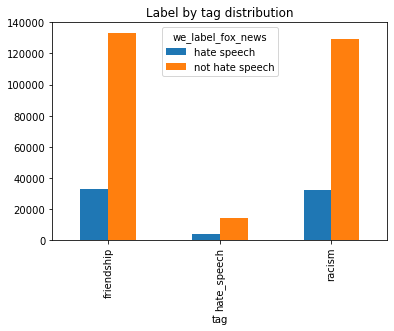

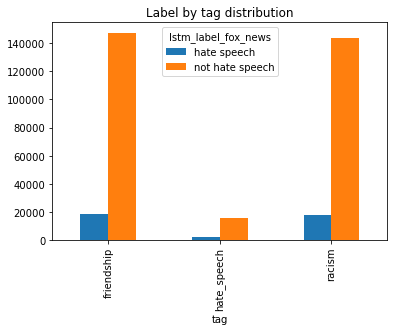

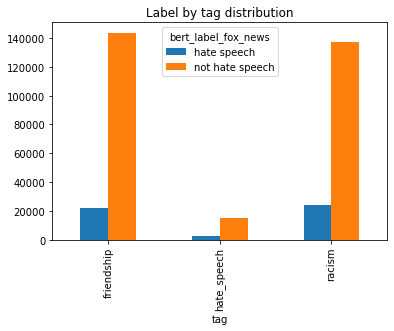

In [22]:
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='we_label_fox_news')
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='lstm_label_fox_news')
plot_label_by_tag_distribution(df_results, title='Label by tag distribution', label='bert_label_fox_news')

<AxesSubplot:title={'center':'Bert, Label by tag distribution (Percentage)'}, xlabel='tag'>

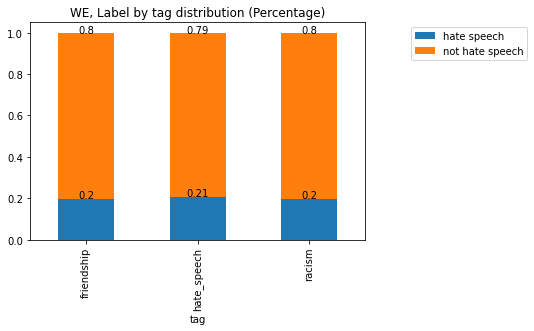

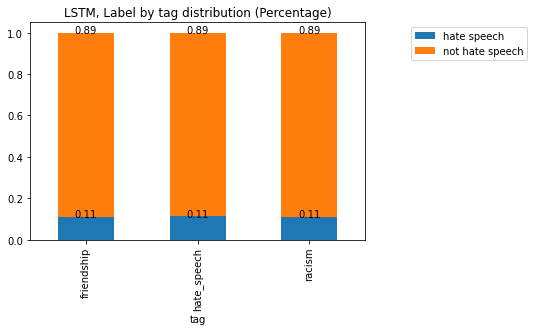

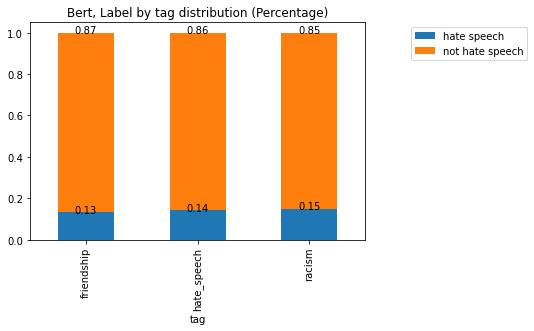

In [24]:
plot_label_by_tag_distribution_percentage(df_results, title='WE, Label by tag distribution (Percentage)', label='we_label_fox_news')
plot_label_by_tag_distribution_percentage(df_results, title='LSTM, Label by tag distribution (Percentage)', label='lstm_label_fox_news')
plot_label_by_tag_distribution_percentage(df_results, title='Bert, Label by tag distribution (Percentage)', label='bert_label_fox_news')

## hate speech examples

In [ ]:
hatespeech_sentences = df_results[df_results.label_fox_news=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

# Word embedding

## Twitter

<AxesSubplot:title={'center':'Bert, Label by tag distribution'}, xlabel='tag'>

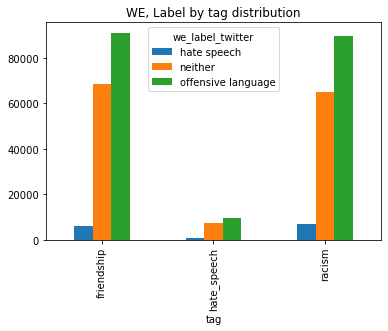

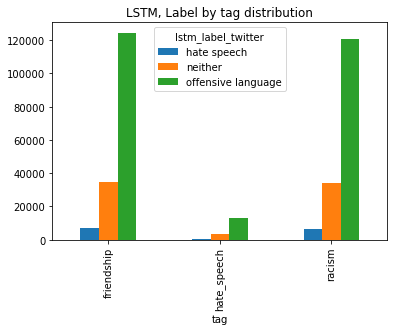

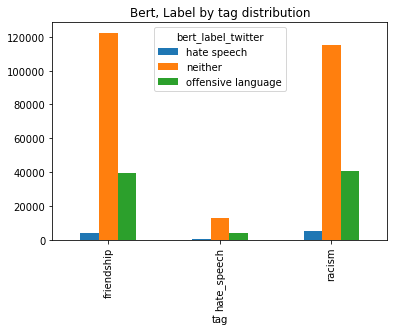

In [26]:
plot_label_by_tag_distribution(df_results, title='WE, Label by tag distribution', label='we_label_twitter')
plot_label_by_tag_distribution(df_results, title='LSTM, Label by tag distribution', label='lstm_label_twitter')
plot_label_by_tag_distribution(df_results, title='Bert, Label by tag distribution', label='bert_label_twitter')

<AxesSubplot:title={'center':'Bert, Label by tag distribution (Percentage)'}, xlabel='tag'>

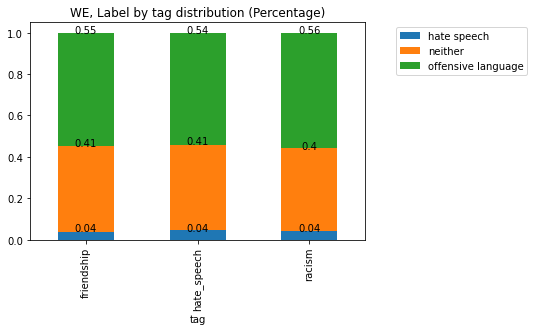

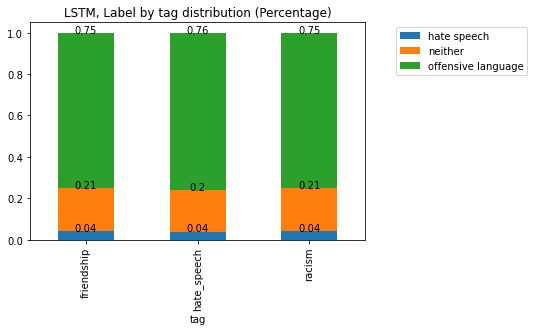

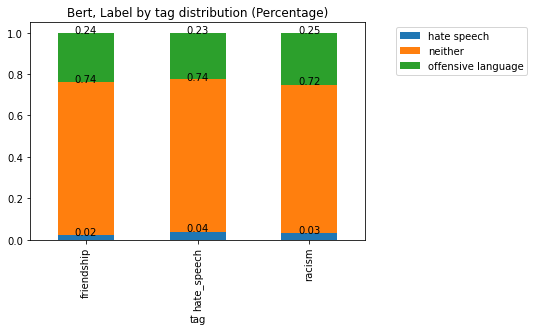

In [27]:
plot_label_by_tag_distribution_percentage(df_results, title='WE, Label by tag distribution (Percentage)', label='we_label_twitter')
plot_label_by_tag_distribution_percentage(df_results, title='LSTM, Label by tag distribution (Percentage)', label='lstm_label_twitter')
plot_label_by_tag_distribution_percentage(df_results, title='Bert, Label by tag distribution (Percentage)', label='bert_label_twitter')

In [ ]:
hatespeech_sentences = df_results[df_results.label_twitter=='hate speech'].utterance.values
for i, utterance in enumerate(hatespeech_sentences):
    if i == 40:
        break
    print(utterance)
    print('---')

## Intersections

### both are "hate speech"

In [ ]:
df_intersections = df_results[(df_results.label_twitter=='hate speech')&(df_results.label_fox_news=='hate speech')]

In [ ]:
df_intersections

### fox news is "hate speech" and twitter is "offensive language"

In [ ]:
df_intersections = df_results[(df_results.label_twitter=='offensive language')&(df_results.label_fox_news=='hate speech')]

In [ ]:
df_intersections

In [28]:
df_results

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech
1,12 Angry Men,1,You did a wonderful job. Wonderful.,2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
2,12 Angry Men,2,Shh. Shh.,2065,racism,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech
3,12 Angry Men,3,"We did it, Pete. We did it.",2065,racism,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
4,12 Angry Men,4,"For a moment, we had our doubts.",2065,racism,hate speech,neither,neither,not hate speech,offensive language,not hate speech
...,...,...,...,...,...,...,...,...,...,...,...
344341,You,1767,Shardae my wife I love you.,1772,friendship,not hate speech,offensive language,offensive language,not hate speech,offensive language,not hate speech
344342,You,1768,And this song I do tonight is dedicated to you.,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,not hate speech
344343,You,1769,He's no stranger to the stage and he's arisen...,1772,friendship,not hate speech,neither,neither,not hate speech,offensive language,hate speech
344344,You,1770,"He'll be performing his hot, new single, Love ...",1772,friendship,not hate speech,offensive language,offensive language,not hate speech,neither,not hate speech


In [31]:
label = 'hate speech'

In [40]:
df_results[(df_results.we_label_twitter==label) & (df_results.lstm_label_twitter==label) & (df_results.bert_label_twitter==label)]

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news
301,12 Angry Men,301,Only an ignorant man can believe that.,2065,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
5769,A Time to Kill,455,"You niggerloving sonofabitch, you won't live i...",2219,racism,not hate speech,hate speech,hate speech,hate speech,hate speech,not hate speech
6182,A Time to Kill,868,I believe you know Reverend Agee.,2219,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
8742,American History X,462,Sweeney is a nigger on a powertrip.,1889,racism,hate speech,hate speech,hate speech,hate speech,hate speech,not hate speech
13773,Apocalypse Now,552,Get the fuck outta here.,2070,racism,not hate speech,hate speech,hate speech,hate speech,hate speech,hate speech
14050,Apocalypse Now,829,They burn him for it?,2070,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
27605,Chinatown,862,You...,1579,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
33650,Donnie Brasco,1351,You'd better fucking kill me.,2202,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
51334,Green Room,1061,You...,1330,racism,not hate speech,hate speech,hate speech,not hate speech,hate speech,not hate speech
65492,LA Confidential,25,"She's an art model, you stupid ape.",1337,racism,not hate speech,hate speech,hate speech,hate speech,hate speech,not hate speech


In [43]:
df_results[(df_results.movie_name=='BlacKkKlansman') & (df_results.bert_label_twitter=='hate speech')][['utterance', 'bert_label_twitter', 'lstm_label_twitter', 'we_label_twitter']]

,utterance,bert_label_twitter,lstm_label_twitter,we_label_twitter
162202,We had a great way of life until the Martin Lu...,hate speech,offensive language,neither
162203,Do you really want your precious white child g...,hate speech,offensive language,offensive language
162204,"They're lying, dirty monkeys, stopping at noth...",hate speech,offensive language,offensive language
162209,"Rapists, murderers, craving the virgin pure fl...",hate speech,offensive language,offensive language
162213,Using an army of outside northern black beast ...,hate speech,offensive language,offensive language
...,...,...,...,...
164699,White lives matter! White lives matter!,hate speech,offensive language,hate speech
164700,White lives matter!,hate speech,offensive language,hate speech
164702,Black lives matter!,hate speech,offensive language,offensive language
164705,"Nazis, go home!",hate speech,offensive language,offensive language
